In [56]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [57]:
# 데이터셋 인스턴스 생성

data = pd.read_csv('C:\\AI\\BP_data.csv')  # CSV 파일 경로

In [58]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [59]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

<Axes: ylabel='count'>

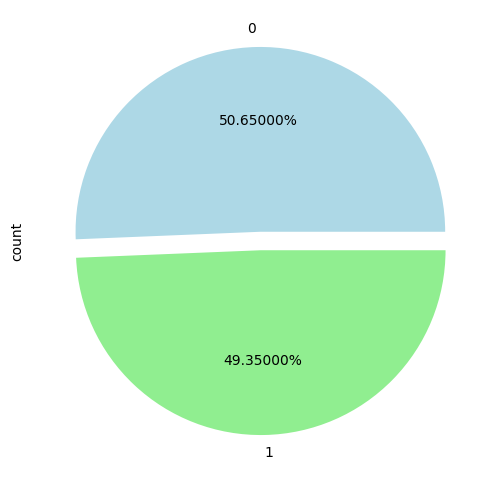

In [60]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
data.Blood_Pressure_Abnormality.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen'], explode=(0.05, 0.05))

In [61]:
# 환자 번호와 고혈압과의 관계 X => feature 탈락
data.drop(columns=['Patient_Number'], inplace=True)

In [62]:
data.isnull().sum()

Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [63]:
# 3/4가 결측치인 관계로 feature 탈락
# data.drop(columns=['Pregnancy'], inplace=True)

In [64]:
# 결측지를 0으로 채우기
data['Genetic_Pedigree_Coefficient'] = data['Genetic_Pedigree_Coefficient'].fillna(0)
data['Pregnancy'] = data['Pregnancy'].fillna(0)

# 결측치를 평균값으로 채우기
# df.fillna(df.mean(), inplace=True) 

mean_A = data['alcohol_consumption_per_day'].mean() # 평균값 구하기 
data['alcohol_consumption_per_day'] = data['alcohol_consumption_per_day'].fillna(mean_A) # 평균값으로 결측치 채우기

In [65]:
columns = ['Blood_Pressure_Abnormality','Level_of_Hemoglobin','Genetic_Pedigree_Coefficient','Age','BMI','Sex','Pregnancy','Smoking','Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day','Level_of_Stress','Chronic_kidney_disease','Adrenal_and_thyroid_disorders']

In [66]:
label_encoders = {}
for column in columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [67]:
data

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,296,90,16,13,1,1,0,1798,1880,245,1,1,1
1,0,146,23,36,23,1,0,0,1006,987,199,2,0,0
2,1,248,91,52,39,0,0,0,361,1152,63,1,1,0
3,0,269,43,53,40,0,0,0,383,286,235,0,1,0
4,1,553,83,34,9,0,0,0,570,1937,390,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,184,2,51,16,1,0,1,1007,1862,139,2,1,0
1996,1,345,100,6,35,1,1,1,69,312,245,2,1,1
1997,1,727,22,0,32,0,0,0,550,961,245,1,1,1
1998,0,283,72,28,35,1,0,1,684,586,247,2,0,1


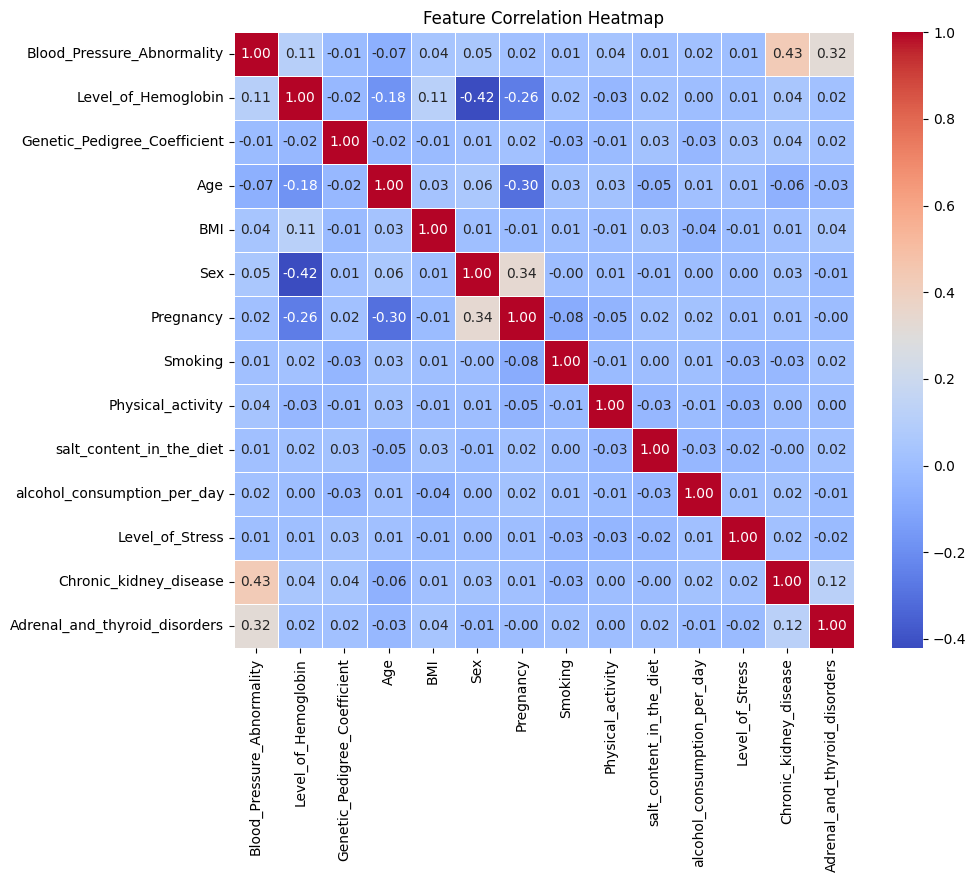

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수만 선택
numeric_df = data.select_dtypes(include=['number'])

# 상관관계 분석 (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [69]:
# 데이터와 타겟 분리
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [70]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 13), (400, 13), (1600,), (400,))

In [72]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [73]:

# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

# 모델 정의

In [75]:
class DiabatesDense(nn.Module):
    def __init__(self):
        super(DiabatesDense, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 이진 분류라서 출력이 1개
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabatesDense()

# 손실 함수 및 최적화 기법 정의

In [76]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습

In [77]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        labels = labels.float().unsqueeze(1)
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            labels = labels.float().unsqueeze(1)
            outputs = model(inputs)
            #_, predicted = torch.max(outputs.data, 1)  이진 분류에서는 사용 X. 다중에서 사용

            probs = torch.sigmoid(outputs)          #이진에서
            predicted = (probs >= 0.5).float()      #사용

            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6647, Accuracy: 69.00%
Epoch 2/20, Loss: 0.5781, Accuracy: 73.00%
Epoch 3/20, Loss: 0.5274, Accuracy: 72.25%
Epoch 4/20, Loss: 0.5115, Accuracy: 74.25%
Epoch 5/20, Loss: 0.4945, Accuracy: 76.00%
Epoch 6/20, Loss: 0.4733, Accuracy: 76.50%
Epoch 7/20, Loss: 0.4537, Accuracy: 77.50%
Epoch 8/20, Loss: 0.4284, Accuracy: 78.50%
Epoch 9/20, Loss: 0.4027, Accuracy: 82.25%
Epoch 10/20, Loss: 0.3800, Accuracy: 83.75%
Epoch 11/20, Loss: 0.3650, Accuracy: 84.75%
Epoch 12/20, Loss: 0.3491, Accuracy: 85.00%
Epoch 13/20, Loss: 0.3386, Accuracy: 86.00%
Epoch 14/20, Loss: 0.3290, Accuracy: 86.00%
Epoch 15/20, Loss: 0.3222, Accuracy: 86.00%
Epoch 16/20, Loss: 0.3168, Accuracy: 85.75%
Epoch 17/20, Loss: 0.3092, Accuracy: 85.75%
Epoch 18/20, Loss: 0.3061, Accuracy: 86.00%
Epoch 19/20, Loss: 0.3036, Accuracy: 86.00%
Epoch 20/20, Loss: 0.2966, Accuracy: 86.25%
Training complete.


# 모델 평가

In [78]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        #_, predicted = torch.max(outputs.data, 1) 다중 클래스 분류

        probs = torch.sigmoid(outputs)     #이진에서
        predicted = (probs >= 0.5).float() #사용
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[174  34]
 [ 21 171]]
F1 Score: 0.86
Precision: 0.86
Recall: 0.86
Specificity: 0.86


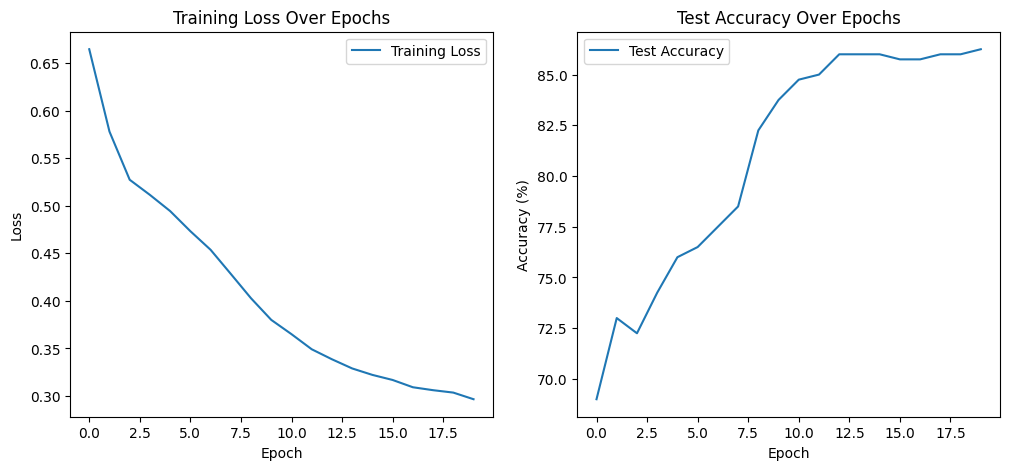

In [79]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()